## Observations and Insights 

#1.From the barplot, we can see that the greatest number of mice were treated with Capomulin and Ramicane;
#2.For the observed mouse (mouse id:s185), as seen in the linegraph, the treatment with Capomulin seems effective. We can observe a decrease in the tumor volume
#as the timepoint increases(longer exposure to the treatment);
#3. There is a positive linear correlation between mouse weight and tumor volume. In other words,there is an increase in tumor volume as the weight of the mouse increases;
#R-squared=.90, indicating that 90% of the variance in tumor volume can be exaplined by the variance in mice weight

In [98]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "/Users/ioanahancu/Desktop/Mouse_metadata.csv"
study_results_path = "/Users/ioanahancu/Desktop/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_number=combined_data.count()[0]
mice_number

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

subset_data=combined_data.loc[:,["Mouse ID", "Timepoint"]]
subset_data.head()
subset_data["MouseID_Freq"]=subset_data.groupby('Mouse ID')['Mouse ID'].transform('count') #code retrieved from: https://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column
subset_data

,Mouse ID,Timepoint,MouseID_Freq
0,k403,0,10
1,k403,5,10
2,k403,10,10
3,k403,15,10
4,k403,20,10
...,...,...,...
1888,z969,25,10
1889,z969,30,10
1890,z969,35,10
1891,z969,40,10


In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 



In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data=combined_data.drop_duplicates(subset=["Mouse ID","Timepoint"], keep="first") #code retrieved from:https://stackoverflow.com/questions/32093829/remove-duplicates-from-dataframe-based-on-two-columns-a-b-keeping-row-with-max
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame
final_mice_number=clean_data.count()["Mouse ID"]
final_mice_number

1888

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# First, we sort merged dataset by Tumor Volume in order to corectly calculate the median values:
clean_data_sort = clean_data.sort_values(["Tumor Volume (mm3)"], ascending=True)

clean_data_sort

# This method is the most straighforward, creating multiple series and putting them all together at the end.

regimen_grouped = clean_data_sort.groupby(["Drug Regimen"])
regimen_grouped

#create a variable to capture the total tumor volume for each regimen
tumor_volume = regimen_grouped["Tumor Volume (mm3)"].sum()

#create computation for the mean of each regimen
regimen_mean = regimen_grouped["Tumor Volume (mm3)"].mean()

#Create computation for the median of each regimen
regimen_median = regimen_grouped["Tumor Volume (mm3)"].median()

#Create computation for the variance of each regimen
regimen_variance = regimen_grouped["Tumor Volume (mm3)"].var()

#create computation for the standard deviation of each regimen
regimen_std = regimen_grouped["Tumor Volume (mm3)"].std()

#create computation for the SEM
regimen_sem = regimen_grouped["Tumor Volume (mm3)"].sem()


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

summary_statistics
# This method produces everything in a single groupby function


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

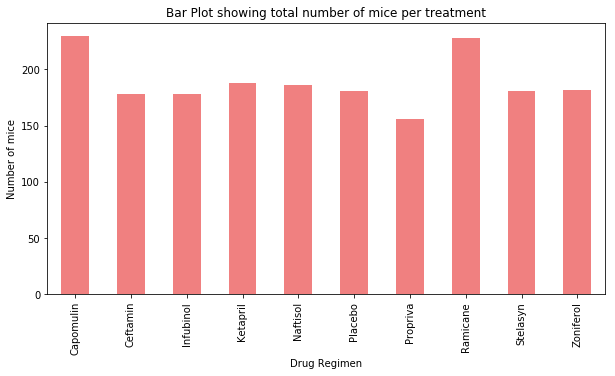

<Figure size 432x288 with 0 Axes>

In [93]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#First, we use groupby "drug regimen" and count mouse id to determine the data points
regimen_data_points = clean_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_data_points

#Second, we plot the points
regimen_data_points.plot(kind="bar", color="lightcoral", figsize=(10,5))

#Last, we set chart title and axis labels
plt.title("Bar Plot showing total number of mice per treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")

#show chart and set layout
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Number of mice')

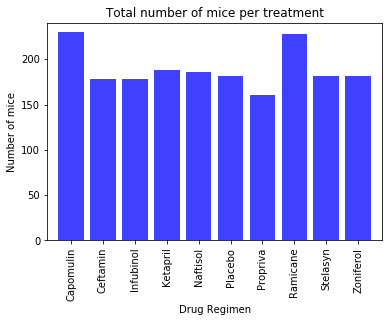

In [102]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#Create an arraw with the datapoints
numbers = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

#Set the x_axis to be the amount of the Data Regimen
x_axis = np.arange(len(regimen_data_points))

plt.bar(x_axis, numbers, color='b', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(numbers)+10)

plt.title("Total number of mice per treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Group by "Mouse ID" and "Sex" to find the number of male vs female
groupby_gender = clean_data.groupby(["Mouse ID","Sex"])
groupby_gender

mouse_gender_df = pd.DataFrame(groupby_gender.size())

#Create a dataframe with the total count of Female and Male mice
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

#format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

#gender_df
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


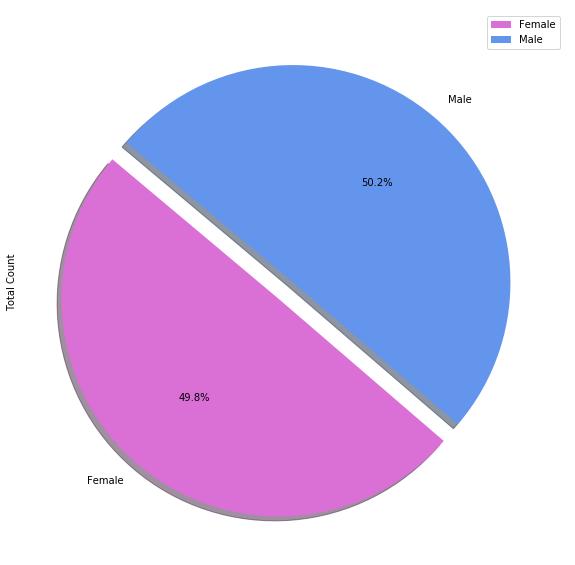

In [10]:
#plot = name of the data frame .plot.pie (sumplots true)
colors = ['orchid', 'cornflowerblue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(10,10), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

(-1.1879383453817904,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

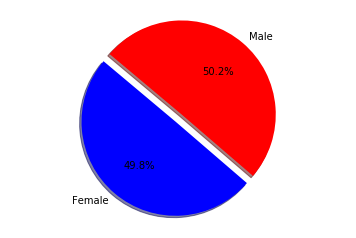

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['blue', 'red']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#Set equal axis
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Extract the top 4 regimenes from the data frame 
subset_data = clean_data[clean_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
subset_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [46]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = subset_data[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

last_timepoint_sort = last_timepoint.groupby(['Mouse ID']).max()['Timepoint']
last_timepoint_sort

Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
        ..
y769    45
y793    45
y865    45
z578    45
z581    45
Name: Timepoint, Length: 100, dtype: int64

In [48]:
#save as a dataframe
last_timepoint_df = last_timepoint_sort.to_frame()
last_timepoint_df

,Timepoint
Mouse ID,
a203,45
a251,45
a275,45
a411,45
a444,45
...,...
y769,45
y793,45
y865,45


In [49]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
lasttimepoint_df = pd.merge(subset_data, last_timepoint_df, on=["Mouse ID","Timepoint"], how='outer')
lasttimepoint_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
809,z581,Infubinol,Female,24,25,25,54.316407,2
810,z581,Infubinol,Female,24,25,30,56.286750,2
811,z581,Infubinol,Female,24,25,35,58.628399,3
812,z581,Infubinol,Female,24,25,40,60.053740,3


In [50]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = lasttimepoint_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    

The lower quartile of tumor volume is: 40.2201707875
The upper quartile of tumor volume is: 50.356470630000004
The interquartile range of tumor volume is: 10.136299842500001
The the median of tumor volume is: 45.0 
Values below 25.01572102375 could be outliers.
Values above 65.56092039375001 could be outliers.


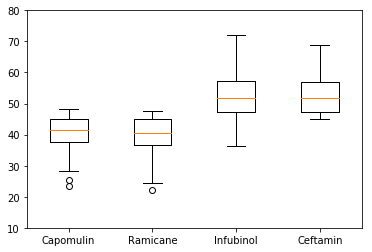

In [51]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = lasttimepoint_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(treatments)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=treatments)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

In [52]:
#Select the data for the mices treated with Capomulin
capomulin_plots_df = lasttimepoint_df[lasttimepoint_df["Drug Regimen"].isin(["Capomulin"])]
capomulin_plots_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
702,r157,Capomulin,Male,22,25,0,45.000000,0
703,r157,Capomulin,Male,22,25,5,45.597064,0
704,r157,Capomulin,Male,22,25,10,46.059608,0


In [53]:
#keep only the columns of interest for the two plots
capomulin_df = capomulin_plots_df[["Mouse ID","Weight (g)", "Tumor Volume (mm3)", "Timepoint"]]
capomulin_df

,Mouse ID,Weight (g),Tumor Volume (mm3),Timepoint
10,s185,17,45.000000,0
11,s185,17,43.878496,5
12,s185,17,37.614948,10
13,s185,17,38.177232,15
14,s185,17,36.866876,20
...,...,...,...,...
440,i557,24,47.685963,45
702,r157,25,45.000000,0
703,r157,25,45.597064,5
704,r157,25,46.059608,10


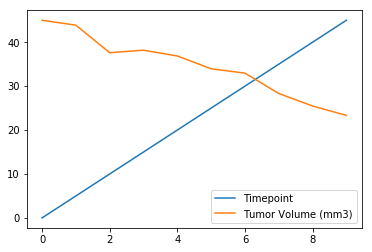

In [70]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_vs_volume = capomulin_df[capomulin_df["Mouse ID"].isin(["s185"])]
time_vs_volume

time_vs_volume_data = time_vs_volume[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_volume_data

line_plot_df = time_vs_volume_data.reset_index()
line_plot_df

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()


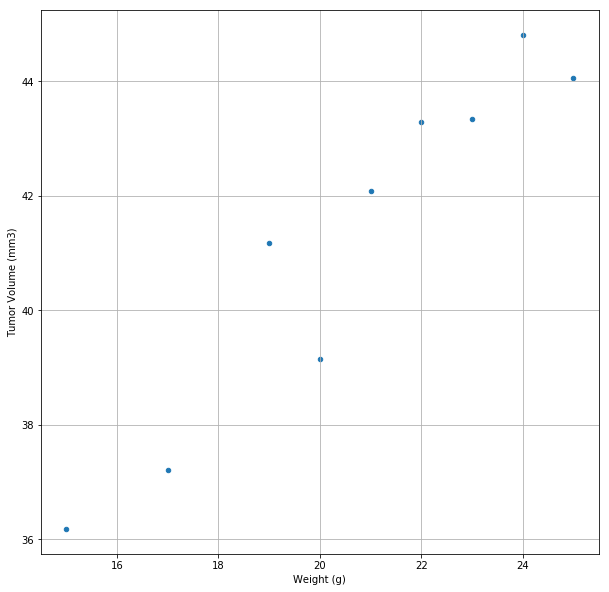

In [75]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_sorted = capomulin_df.sort_values(["Weight (g)"], ascending=True)

capomulin_scatterplot = capomulin_sorted.reset_index()

capomulin_weight = capomulin_scatterplot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

capo_grouped = pd.DataFrame(capomulin_weight).reset_index()


capomulin_scatter = capo_grouped.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)', grid=True, figsize= (10,10))

## Correlation and Regression

In [91]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

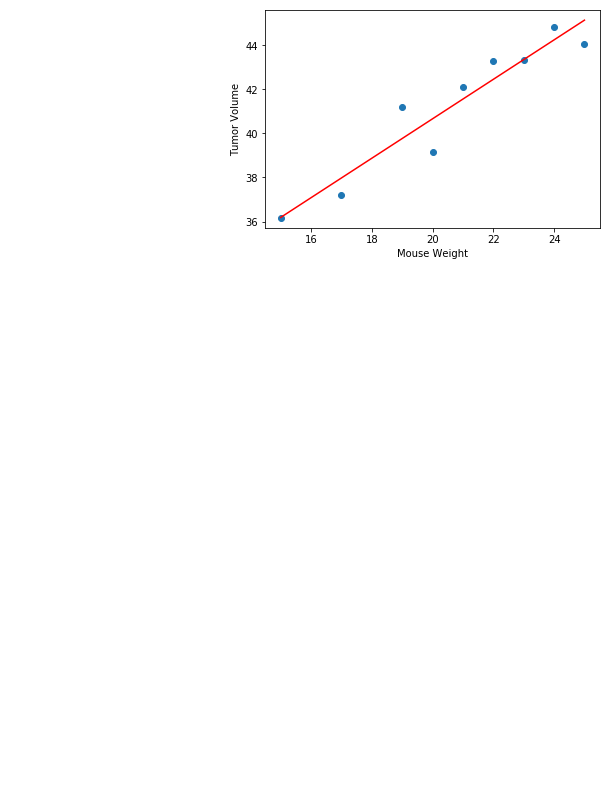

The r-squared is: 0.90349662774386


In [92]:
x_values = capo_grouped['Weight (g)']
y_values = capo_grouped['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.show()
print(f"The r-squared is: {rvalue**2}")

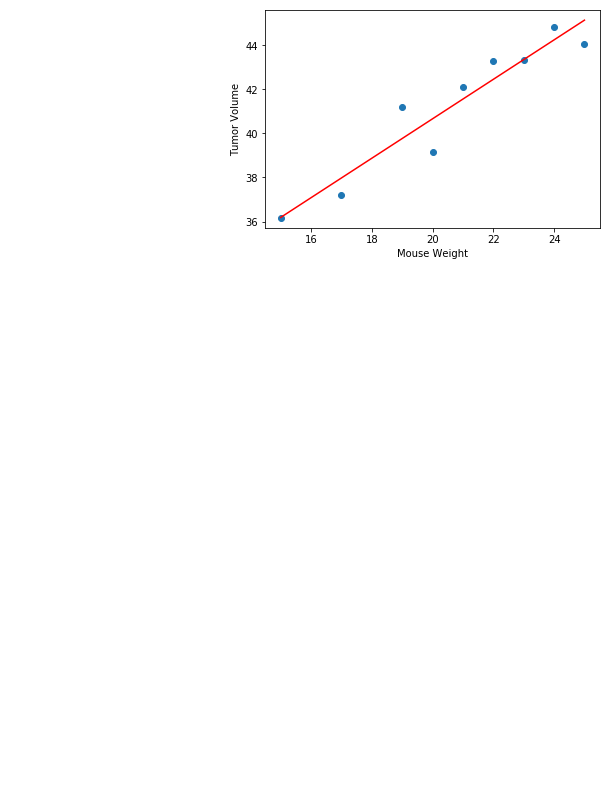